## Book Rating/Reviews EDA

This notebook will explore the relationship between reviews and number of
reviews on sales.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

#### Load data

In [2]:
data_path = 'D:\\PycharmProjects\\springboard\\data\\'
rating = pd.read_csv(f'{data_path}book_rating.csv')
goodreads = pd.read_csv(f'{data_path}book_goodread.csv')
sales = pd.read_csv(f'{data_path}book_sales.csv')

d:\pycharmprojects\springboard\venv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Adding book_title_length column

Note that we also include white space in the title as without it the title
doesn't make much sense!

In [3]:
rating['book_title_length'] = rating['book_title'].str.len()

Number of books by Publishers

In [4]:
# Top publisher by number of books
top_20_publisher = list(rating.publisher.value_counts()[:20].index)

# Set pattern for top 20 publisher
pat = '|'.join(top_20_publisher)

# Columns for top 20 publishers
rating['top_20_publisher'] = rating['publisher'].str.contains(f'({pat})').fillna(value=False)
rating['top_20_publisher'] = rating['top_20_publisher'].astype('category')
rating[rating['top_20_publisher'] == True].groupby('publisher')['ISBN'].count().sort_values(ascending=False)

d:\pycharmprojects\springboard\venv\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


publisher
Harlequin                      7524
Silhouette                     4190
Pocket                         3896
Ballantine Books               3775
Bantam Books                   3640
                               ... 
Scholastic 10x8 paperback         1
Scholastic 8x6 paperback          1
Scholastic Apple Paperbacks       1
Scholastic Audio Cassette         1
A Disney/Bantam Books             1
Name: ISBN, Length: 228, dtype: int64

First, let we take a look at some top selling authors in history.
Note that one book can have many ISBNs as their related affiliates

In [5]:
# Top authors list
top_authors = ['Stephen King', 'J.K. Rowling', 'J. K. Rowling', 'James Patterson', 'John Grisham', 'Dan Brown',
               'Michael Wolff', 'Nora Roberts', 'Danielle Steel', 'Rick Riordan', 'Tolkien']

# Set pattern for top authors
pattern = '|'.join(top_authors)

# Top author columns
rating['top_author'] = rating['book_author'].str.contains(f'({pattern})', regex=True).fillna(value=False)
rating['top_author'] = rating['top_author'].astype('category')
top_authors_rating = rating[rating['top_author']==True].groupby('book_author')['ISBN'].count().sort_values(ascending=False)

Just by the number alone, Stephen Kings and Nora Roberts makes up for
many ISBNs. One reason is that they write a lot of books that are very good.
Moreover, all of these top authors are the defacto leaders in their
respective genre: Stephen King in thriller/horror, Nora Roberts in Romance,
Tolkien in epic fantasy...

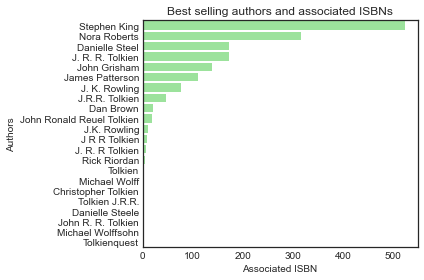

In [32]:
# Top selling authors and their many related isbn
sns.barplot(y=top_authors_rating.index, x=top_authors_rating, color='lightgreen')
plt.title('Best selling authors and associated ISBNs')
plt.ylabel('Authors')
plt.xlabel('Associated ISBN')
plt.tight_layout()
plt.savefig('images/top_author_associated_isbn')


## Distribution of book rating

Text(0.5, 1.0, 'Distribution of Book Rating')

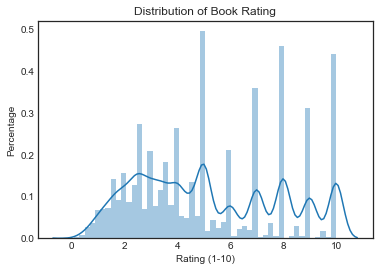

In [7]:
# Rating distribution
sns.distplot(rating[rating.book_rating > 0].book_rating)
plt.xlabel('Rating (1-10)')
plt.ylabel('Percentage')
plt.title('Distribution of Book Rating')

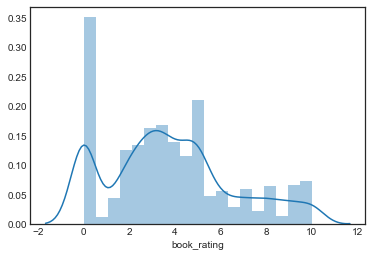

In [8]:
# Rating Among top authors 
sns.distplot(rating[rating['top_author']==True].book_rating)

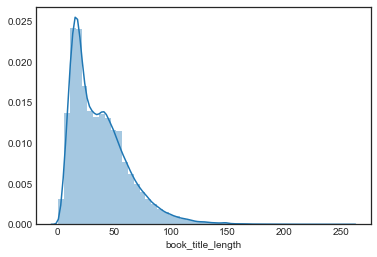

In [9]:
# Book title length distribution
sns.distplot(rating.book_title_length)

### Number of Reviews vs Sales

However, high count of reviews is not high rating. Thus, the amount of reviews may be
correlated to other factor such as time since published and genre.

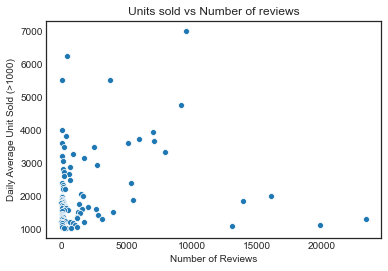

In [20]:
# Total review versus unit sold
sns.scatterplot(y='daily_average_units_sold',
                x='total_reviews', data=sales[sales.daily_average_units_sold>1000])
plt.title('Units sold vs Number of reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Daily Average Unit Sold (>1000)')
plt.savefig('images/unit_sold_vs_total_reviews.png')

There are some outliers here that greatly influence our plot. If we remove
the titles with super high number of reviews (>10000) and limit to top seller
(>1000) only, we can see there is a positive correlation here.

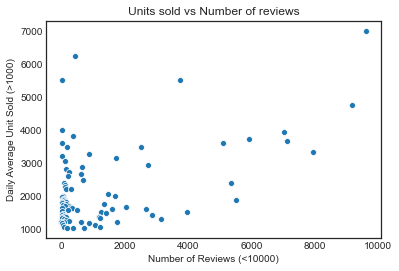

In [25]:
# Total review (<10000) versus unit sold
sns.scatterplot(y='daily_average_units_sold',
                x='total_reviews',
                data=sales[(sales.daily_average_units_sold>1000) & (sales.total_reviews<10000)])
plt.title('Units sold vs Number of reviews')
plt.xlabel('Number of Reviews (<10000)')
plt.ylabel('Daily Average Unit Sold (>1000)')
plt.savefig('images/unit_sold_1000_total_reviews_10000.png')

Taking a quick look into genre of sale data, we see again there are so many observations
that are out of normal range. All this behavior strongly suggest that bestsellers makes
up the bulk of big money in book sale. There are hundreds of thousands of books but
perhaps only the small fraction of bestsellers enjoy the majority of the revenue.

A majority of books has a good average rating of above 4. However, fiction and genre
fictions makes up the majority of sales.

There is a subgroup that has zero average rating. We should take a look at these to
see why.

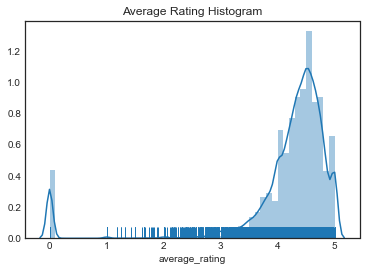

In [12]:
# Rating Distribution
sns.distplot(sales.average_rating, kde=True, rug=True)
plt.title('Average Rating Histogram')
plt.savefig('images/average_rating_hist.png')

## Rating and sales

When restricting to top sellers (>1000) we can observe a very slight
effect of rating no unit sold. The effect here is much less than the total
number of reviews which suggest quantity of reviews is more important
than quality of it.

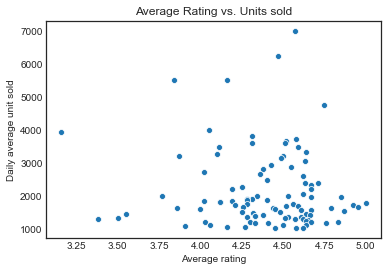

In [30]:
# Average rating vs units_sold
sns.scatterplot(x='average_rating', y='daily_average_units_sold',
                data=sales[sales.daily_average_units_sold > 1000])
plt.title('Average Rating vs. Units sold')
plt.xlabel('Average rating')
plt.ylabel('Daily average unit sold')
plt.savefig('images/average_rating_vs_unit_sold.png')
